## 1. Conheça o Professor William Sharpe
<p>Um investimento pode fazer sentido se esperamos que ele retorne mais dinheiro do que custa. Mas os retornos são apenas parte da história porque são arriscados - pode haver uma série de resultados possíveis. Como comparar diferentes investimentos que podem entregar resultados semelhantes em média, mas exibem níveis diferentes de riscos?</p>
<p>Entrou William Sharpe. Ele introduziu o Shaper Ratio em 1966 que logo veio a ser chamado de Sharpe Ratio. Ele compara os retornos esperados para duas oportunidades de investimento e calcula o retorno adicional por unidade de risco que um investidor poderia obter escolhendo um em detrimento do outro. Em particular, analisa a diferença nos retornos de dois investimentos e compara a diferença média com o desvio padrão (como medida de risco) dessa diferença. Uma taxa de Sharpe mais alta significa que a recompensa será maior para uma determinada quantidade de risco. É comum comparar uma oportunidade específica com um benchmark que representa toda uma categoria de investimentos.</p>
<p>A relação Sharpe tem sido uma das medidas de risco/ retorno mais populares em finanças, até porque é tão simples de usar. Também ajudou que o professor Sharpe ganhou um Prêmio Nobel em Economia em 1990 por seu trabalho sobre o modelo de precificação de ativos de capital (CAPM).</p>
<p>O rácio de Sharpe é normalmente calculado para uma carteira e utiliza a taxa de juro sem risco como referência. Vamos simplificar nosso exemplo e usar ações em vez de um portfólio. Também usaremos um índice de ações como referência, em vez da taxa de juros sem risco, porque ambos estão prontamente disponíveis em frequências diárias e não precisamos converter as taxas de juros da frequência anual para a diária. Basta ter em mente que você executaria o mesmo cálculo com retornos de portfólio e sua taxa de escolha livre de risco, por exemplo, a Taxa de Faturas do Tesouro de 3 meses</p>
<p>Então, vamos aprender sobre a proporção de Sharpe calculando-a para as ações dos dois gigantes da tecnologia Facebook e Amazon. Como referência, usaremos o S&amp;P 500 que mede o desempenho das 500 maiores ações nos EUA. Quando usamos um índice de ações em vez do riscotaxa livre, o resultado é chamado de Razão de Informação e é usado para comparar o retorno sobre o gerenciamento de portfólio ativo, porque diz quanto mais retorno para uma determinada unidade de risco seu gerente de portfólio ganhou em relação a apenas colocar seu dinheiro em um fundo de índice de baixo custo.</p>

In [2]:
# Impotando módulo necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurações para porduzir bons gráficos no Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Lendo os dados
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
benchmark_data = pd.read_csv('datasets/benchmark_data.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()

## 2. Uma primeira olhada nos dados
<p>Vamos dar uma olhada nos dados para descobrir quantas observações e variáveis temos à nossa disposição.</p>

In [3]:
# Exibindo o sumário de stock_data
print('Stocks\n')
stock_data.info()
stock_data.head()

# Exibindo o sumário de benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


## 3. Plotar e resumir os preços diários para Amazon e Facebook
<p>Antes de compararmos um investimento no Facebook ou na Amazon com o índice das 500 maiores empresas dos EUA, vamos visualizar os dados, para entender melhor o que estamos lidando.</p>

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


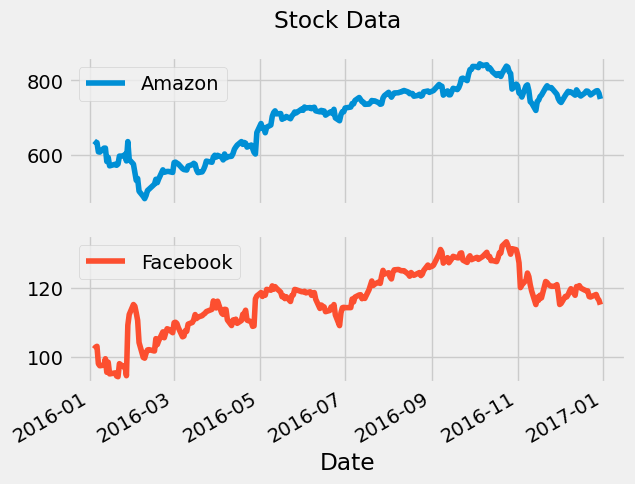

In [4]:
# Visualizando stock_data
stock_data.plot(subplots = True, title = 'Stock Data')

# Sumário de stock_data
stock_data.describe()

## 4. Visualize e resuma valores diários para o S&P 500
<p>Vamos também dar uma olhada no valor do S&amp;P 500, nossa referência.</p>

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


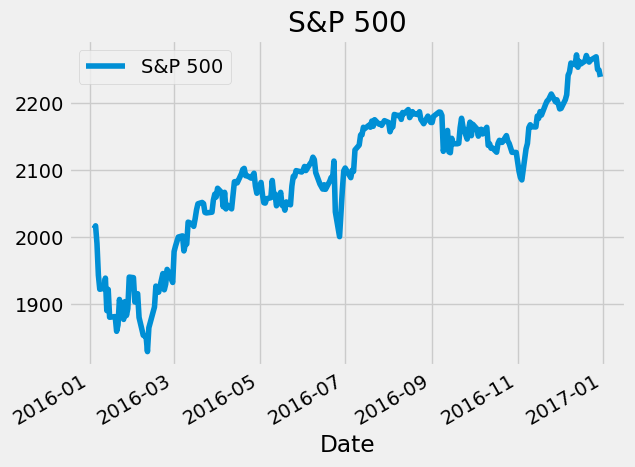

In [5]:
# Visualizando benchmark_data
benchmark_data.plot(title = 'S&P 500')

#Sumário de benchmark_data
benchmark_data.describe()

## 5. Vamos também dar uma olhada no valor do S&amp;P 500, nossa referência.
<p>O Sharpe Ratio usa a diferença nos retornos entre as duas oportunidades de investimento em consideração.</p>
<p>No entanto, nossos dados mostram o valor histórico de cada investimento, não o retorno. Para calcular o retorno, precisamos calcular a variação percentual no valor de um dia para o outro. Também vamos dar uma olhada nas estatísticas de resumo, porque estas se tornarão nossas entradas à medida que calculamos a Proporção de Sharpe. Já consegue adivinhar o resultado?</p>

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


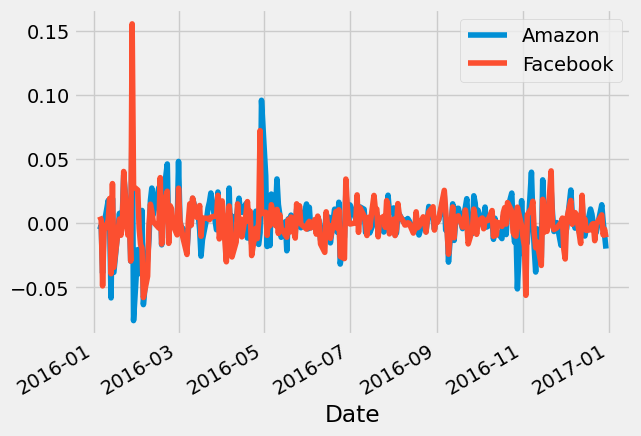

In [6]:
# Calculando os retornos diários stock_data
stock_returns = stock_data.pct_change()

# Plotando os retornos diários
stock_returns.plot()

# Sumarizando os retornos diários
stock_returns.describe()

## 6.  Retornos diários do S&P 500
<p>Para o S&amp;P 500, calcular retornos diários funciona da mesma maneira, só precisamos ter certeza de selecioná-lo como uma série usando colchetes simples e não como um dataframe para facilitar os cálculos na próxima etapa.</p>

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

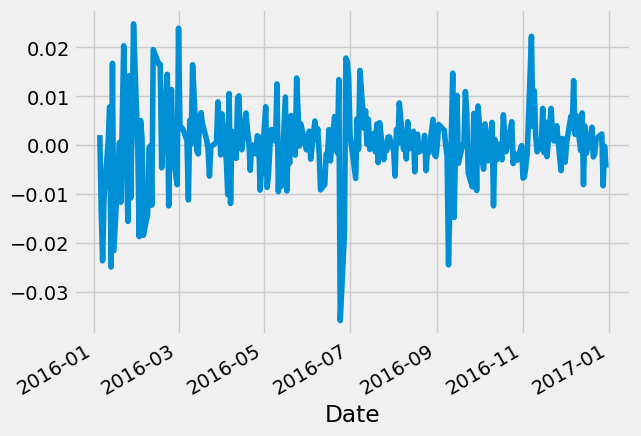

In [7]:
# Calculando os retornos diários  benchmark_data 
sp_returns = benchmark_data['S&P 500'].pct_change()

# Plotando os retornos diários
sp_returns.plot()

# Sumarizando os retornos diários
sp_returns.describe()

## 7. Calculando retornos em excesso para Amazon e Facebook vs. S&P 500
<p>Em seguida, precisamos calcular o desempenho relativo das ações vs. o benchmark S&amp;P 500. Isto é calculado como a diferença nos retornos entre stock_returns e sp_returns para cada dia.</p>

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


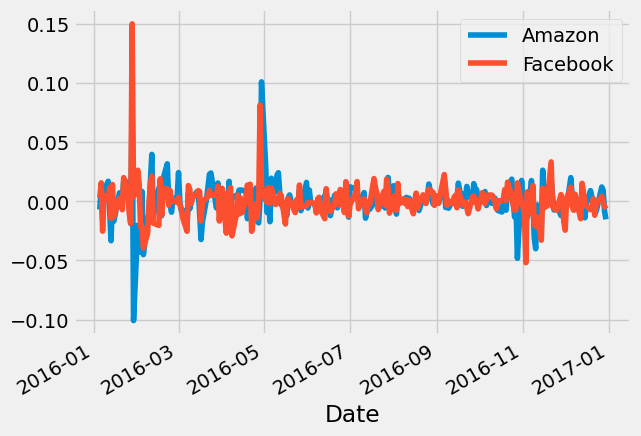

In [8]:
# Calculando a diferença em retornos diários
excess_returns = stock_returns.sub(sp_returns,axis = 0)

# Plotando excess_returns
excess_returns.plot()

# Sumarizando  excess_returns
excess_returns.describe()

## 8. A Proporção de Sharpe, Passo 1: A Diferença Média nos Retornos Diários de Ações vs S&P 500
<p>Agora podemos finalmente começar a calcular a Proporção de Sharpe. Primeiro precisamos calcular a média dos excessos. Isso nos diz quanto mais ou menos os rendimentos de investimento por dia em comparação com o benchmark.</p>

<AxesSubplot:title={'center':'Média das Diferenças de Retorno Mean'}>

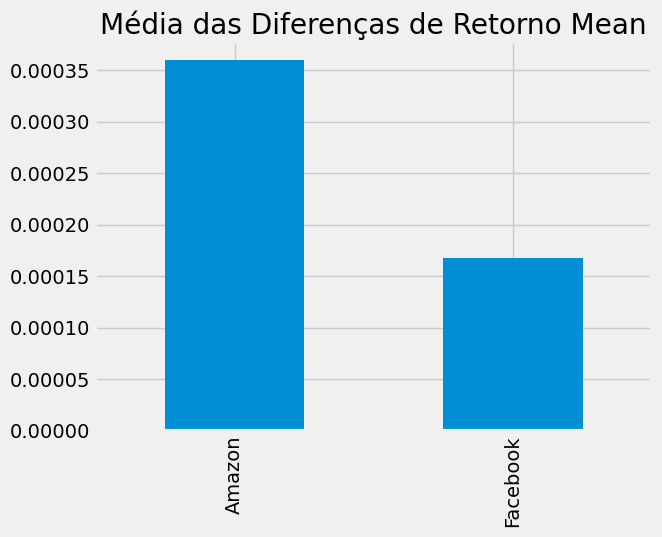

In [9]:
# Calculando a média de excess_returns 
avg_excess_return = excess_returns.mean()

# Plotando avg_excess_returns
avg_excess_return.plot.bar(title= 'Média das Diferenças de Retorno Mean')

## 9. A relação de nitidez, etapa 2: desvio padrão da diferença de retorno
<p>Parece que houve uma grande diferença entre os retornos diários médios da Amazon e do Facebook.
</p>
<p>Em seguida, calculamos o desvio padrão dos excessos. Isso nos mostra a quantidade de risco que um investimento nas ações implica em comparação com um investimento no S&amp;P 500.</p>

array([<AxesSubplot:>], dtype=object)

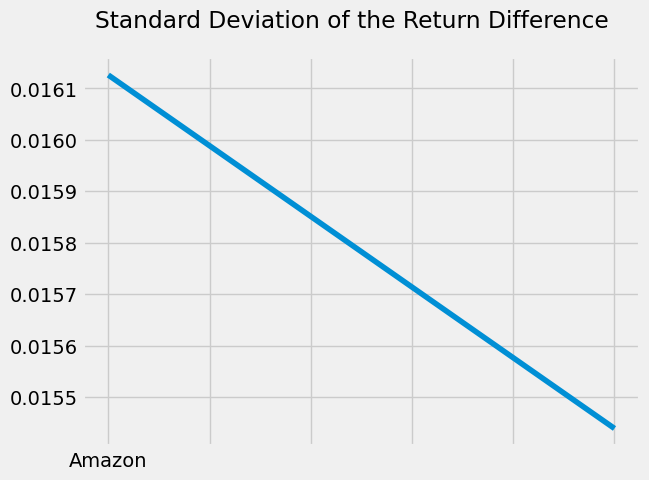

In [10]:
# Calclando o desvio padrão
sd_excess_return = excess_returns.std()

# Plotando o desvio
sd_excess_return.plot(title = 'Standard Deviation of the Return Difference', subplots = True)

## 10. Colocando tudo junto
<p>Agora só precisamos calcular a proporção de avg_excess_returns e sd_excess_returns. O resultado é agora finalmente a relação de Sharpe e indica quanto mais (ou menos) retorno a oportunidade de investimento sob consideração rende por unidade de risco.

A Proporção de Sharpe é muitas vezes anualizada multiplicando-a pela raiz quadrada do número de períodos. Usamos dados diários como entrada, então usaremos a raiz quadrada do número de dias de negociação (5 dias, 52 semanas, menos alguns feriados):  252</p>

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

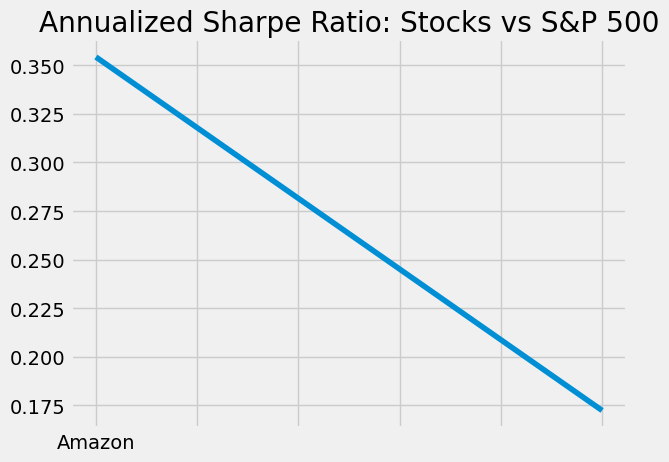

In [11]:
# Calculando sharpe ratio diário
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Anualizando o sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Plotando sharpe ratio anualizado
# ... YOUR CODE FOR TASK 10 HERE ...
annual_sharpe_ratio.plot(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')

## 11. Conclusão
<p>Dadas as duas razões de Sharpe, que investimento devemos buscar? Em 2016, a Amazon tinha uma proporção de Sharpe duas vezes maior que o Facebook. Isso significa que um investimento na Amazon retornou duas vezes mais em comparação com o S&P 500 para cada unidade de risco que um investidor teria assumido. Em outras palavras, em termos ajustados ao risco, o investimento na Amazon teria sido mais atraente.

Essa diferença foi impulsionada principalmente por diferenças de retorno e não de risco entre a Amazon e o Facebook. O risco de escolha da Amazônia em relação ao FB (medido pelo desvio padrão) foi apenas ligeiramente maior, de modo que a maior proporção de Sharpe para a Amazônia acaba sendo maior, principalmente devido aos maiores retornos médios diários para a Amazônia.

Quando confrontado com alternativas de investimento que oferecem retornos e riscos diferentes, o Sharpe Ratio ajuda a tomar uma decisão ajustando os retornos pelas diferenças de risco e permite que um investidor compare oportunidades de investimento em igualdade de condições, ou seja, em umbase de tarefas.</p>

In [12]:
# Faça sua escolha descomentando abaixo.
# buy_amazon = True
# buy_facebook = True